In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns


In [30]:
df=pd.read_csv(r"C:\Users\Asus\Desktop\course material\Marketing Analytics\KAG_conversion_data.csv")
df.head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [31]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [33]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [34]:
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [35]:
#To check if there are any null values in the data
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [36]:
print("The number of 0-values in Clicks (given that Conversion are non-zero):", len(df[(df["Clicks"] == 0) & (df["Total_Conversion"] != 0)]))

The number of 0-values in Clicks (given that Conversion are non-zero): 204


We can see that some of entries are wrong, containing 0 values in Clicks, while the other columns such as Total_Conversion have non-zero values. This is not correct because an ad cannot have postive conversions (customers) when there is no one clicks on it.

In [37]:
#Imputing the clicks column using K-Nearest Neighbours
df["Clicks"].replace(0, np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=["gender", "age"])))

df["Clicks"] = df_imputed[5]

In [38]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1.0,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2.0,1.82,2,0
2,708771,916,103920,30-34,M,20,693,1.0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1.0,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1.0,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,1.0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3.0,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1.0,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1.0,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3.0,3.16,1,0


In [39]:
df["CR"] = df["Total_Conversion"] / df["Impressions"]
df["CTR"] = df["Clicks"] / df["Impressions"]
df["CPC"] = df["Spent"] / df["Clicks"]

We can perform feature engineering using the available dataset to create key performance indicators (KPIs) that are crucial for subsequent analysis:

1. Conversion Rate (CR):
   - CR is a metric that quantifies the proportion of users who express interest in a product by making an inquiry after viewing an advertisement. It enables us to gauge the percentage of users who were motivated by the ad during a marketing campaign and actually made a purchase.

2. Click-Through Rate (CTR):
   - CTR represents the ratio of users who clicked on an ad to the total number of users who viewed that ad. In simpler terms, CTR measures the percentage of users who found the ad engaging and relevant enough to take action by clicking on it. This KPI helps assess how effective the ads are in capturing the attention of the intended audience.

3. Cost Per Click (CPC):
   - CPC indicates the expense incurred for each click generated by an ad. This metric aids in evaluating the cost-efficiency of acquiring an additional user's attention through the ad. It tells us whether the spending on attracting more users to engage with the ad is economical or not.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5220\1761524751.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns=["CR", "CPC", "CTR","ad_id","xyz_campaign_id","fb_campaign_id","interest"]).corr(), annot=True,fmt=".2f", cmap="coolwarm")


<Axes: >

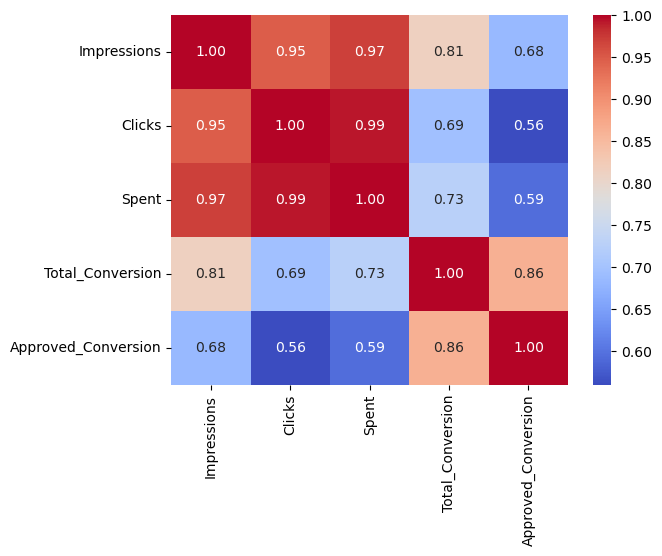

In [44]:
sns.heatmap(df.drop(columns=["CR", "CPC", "CTR","ad_id","xyz_campaign_id","fb_campaign_id","interest"]).corr(), annot=True,fmt=".2f", cmap="coolwarm")

As anticipated, there is a clear presence of multicollinearity among the variables Impressions, Clicks, and Spent, indicating a nearly perfect linear dependence relationship between them. In the case of the other features, while the correlation coefficients are not as pronounced, they are still relatively high, falling within the range of approximately 0.56 to 0.86.

In [62]:
df["xyz_campaign_id"].replace({916:"campaign_1",936:"campaign_2",1178:"campaign_3"}, inplace=True)

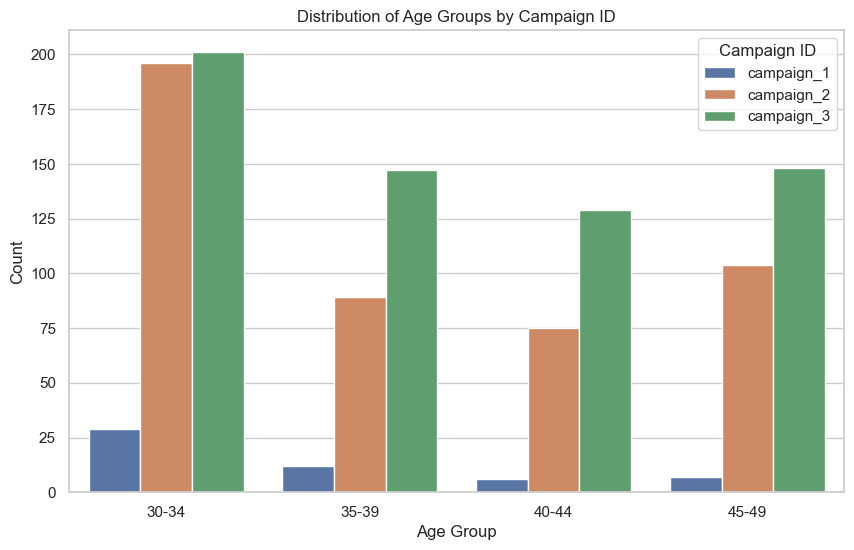

In [69]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x="age", hue="xyz_campaign_id")

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups by Campaign ID")

# Display the plot
plt.legend(title='Campaign ID')
plt.show()


All three campaigns primarily target the 30-34 age group

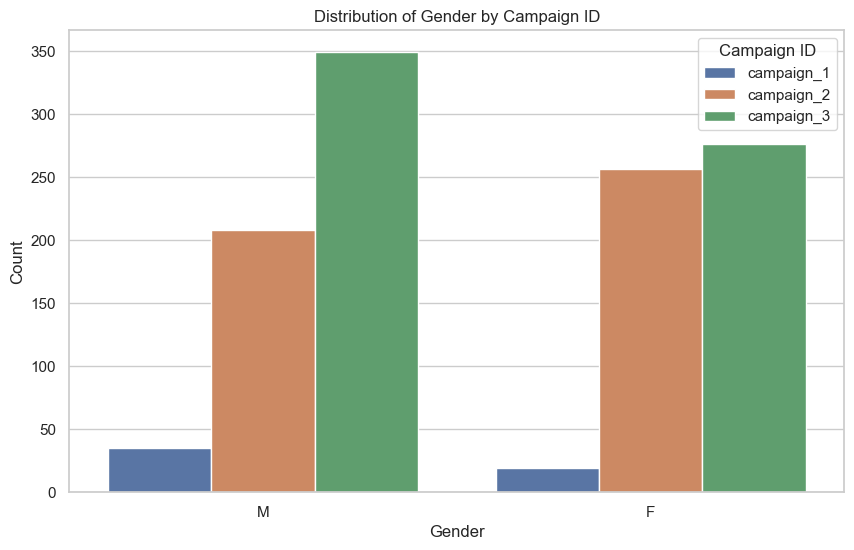

In [71]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x="gender", hue="xyz_campaign_id")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender by Campaign ID")

# Display the plot
plt.legend(title='Campaign ID')
plt.show()


Campaign_2 has a mostly female audience, while the other two campaigns have more male audiences.

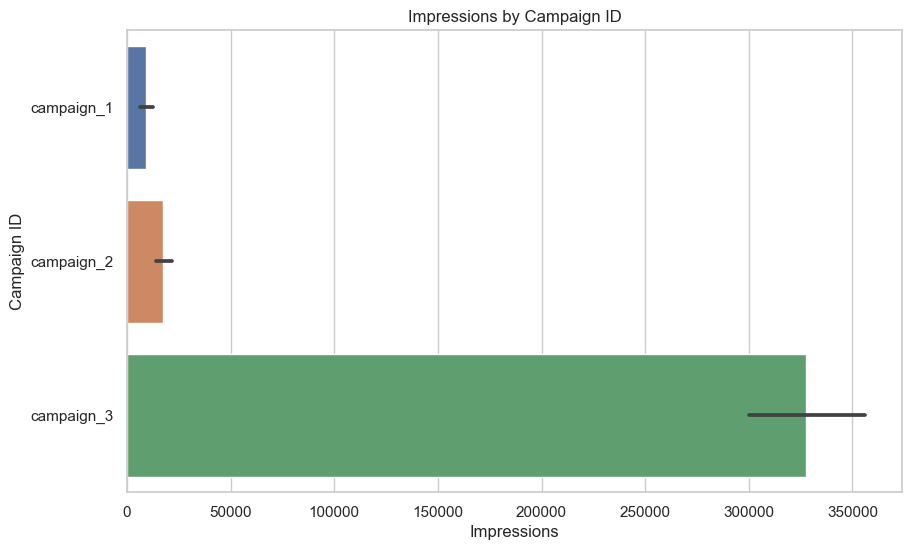

In [77]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df,x="Impressions", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("Impressions")
plt.ylabel("Campaign ID")
plt.title("Impressions by Campaign ID")

# Display the plot
plt.show()


Campaign_3 dominates in terms of Impressions

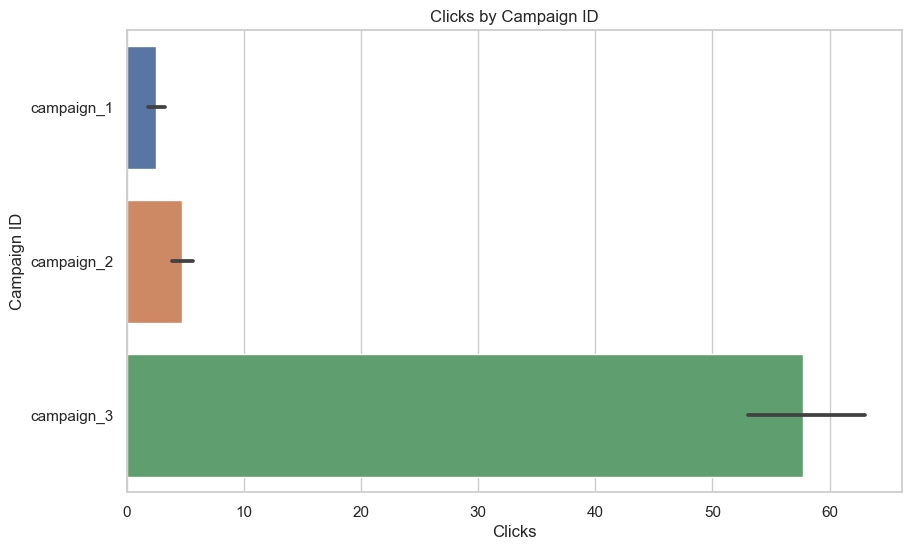

In [82]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df, x="Clicks", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("Clicks")
plt.ylabel("Campaign ID")
plt.title("Clicks by Campaign ID")

# Display the plot
plt.show()


Campaign_3 dominates in terms of Clicks

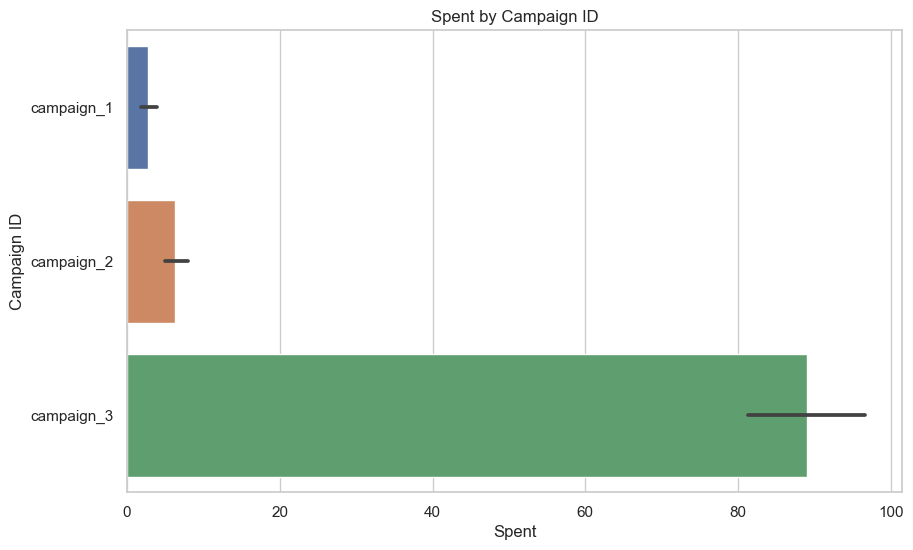

In [83]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df, x="Spent", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("Spent")
plt.ylabel("Campaign ID")
plt.title("Spent by Campaign ID")

# Display the plot
plt.show()


Campaign_3 dominates in terms of Investments(Spent)

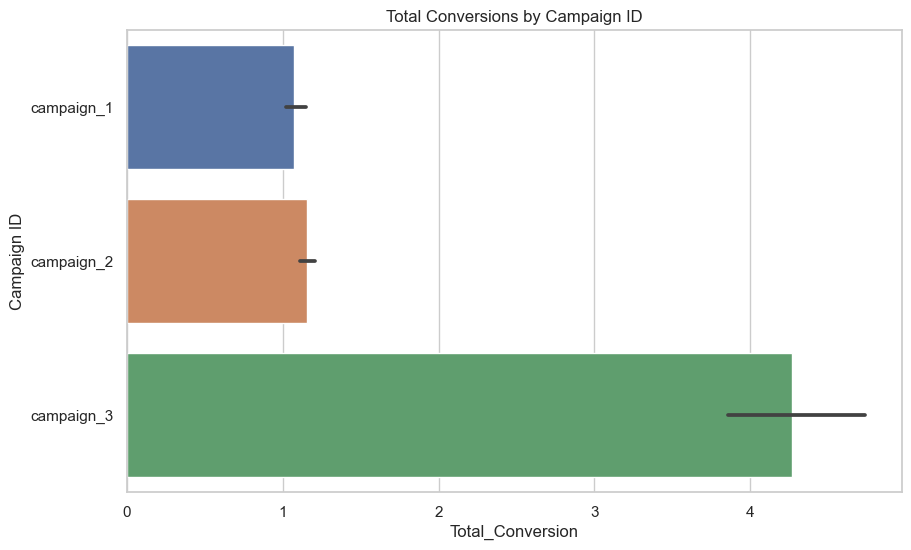

In [84]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df, x="Total_Conversion", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("Total_Conversion")
plt.ylabel("Campaign ID")
plt.title("Total Conversions by Campaign ID")

# Display the plot
plt.show()


Campaign_3 dominates in terms of Total_Conversion.This was expected as campaign_3 is dominant in number of clicks and spent category.

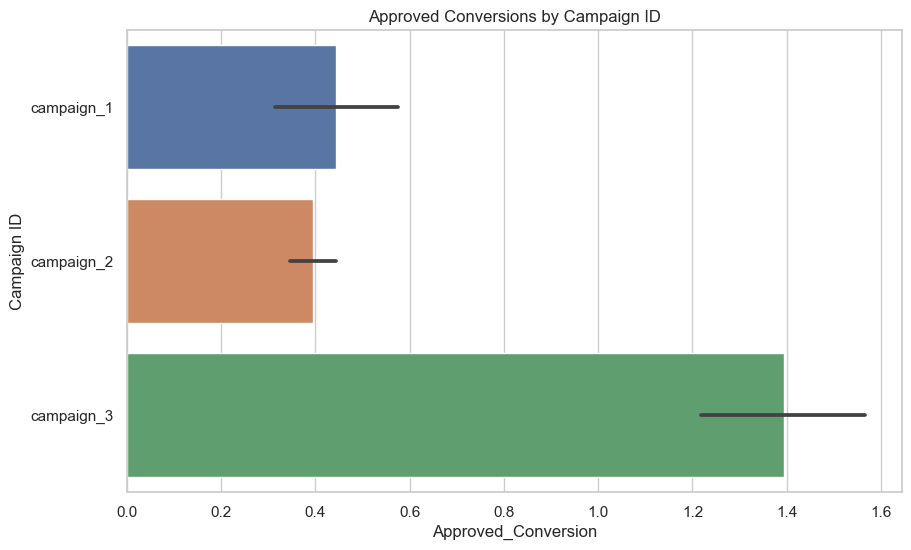

In [88]:

plt.figure(figsize=(10, 6)) 
sns.barplot(data=df, x="Approved_Conversion", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("Approved_Conversion")
plt.ylabel("Campaign ID")
plt.title("Approved Conversions by Campaign ID")

# Display the plot
plt.show()



Campaign_3 dominates in terms of Approved_Conversion.This was expected as campaign_3 is dominant in number of clicks and spent category.

Based on the above bar graphs, it's evident that Campaign_3 outperforms the other two campaigns in terms of spending, impressions, clicks, and conversions. This outcome aligns with our earlier observation in the heatmap, which indicated a strong correlation between these variables. In essence, a higher campaign budget leads to increased audience reach, resulting in higher clicks and conversions, as one would naturally anticipate.

It's evident that campaign_3 surpasses its counterparts with considerably higher engagement and conversion rates. However, as we recall, this is likely due to the significantly larger budget allocated to campaign_3 by the company than to Campaign_1 and Campaign_2. We can't determine whether the other campaigns would achieve similar or even better results if they were funded at the same level. Therefore, it wouldn't be reasonable to hastily conclude that Campaign_3 is more efficient.

# A/B TESTING

To obtain a more accurate evaluation of the actual performance of the campaigns, we need to examine the selected Key Performance Indicators (KPIs) - CR, CPC, and CTR, as mentioned earlier. In brief, CR (conversion rate) gauges the conversion effectiveness of each campaign, CPC (cost per click) assesses the cost-efficiency of each click an ad set receives, and CTR (click-through rate) indicates the ability to attract and engage customers. These metrics are expressed as ratios, which enables a more robust and precise comparison between advertising campaigns, even when there are significant differences in spending.

Lets vizualize all the KPI's one by one to gain better insights

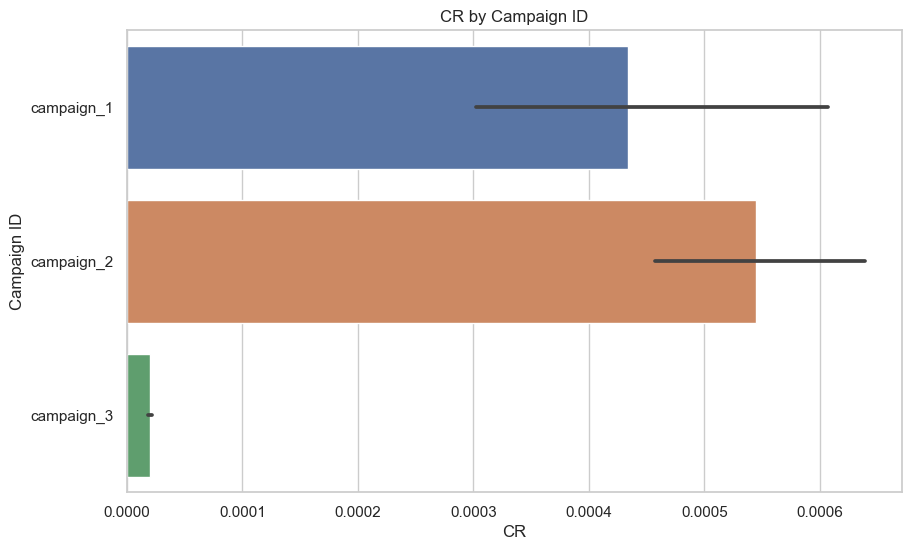

In [93]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="CR", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("CR")
plt.ylabel("Campaign ID")
plt.title("CR by Campaign ID")

# Display the plot
plt.show()

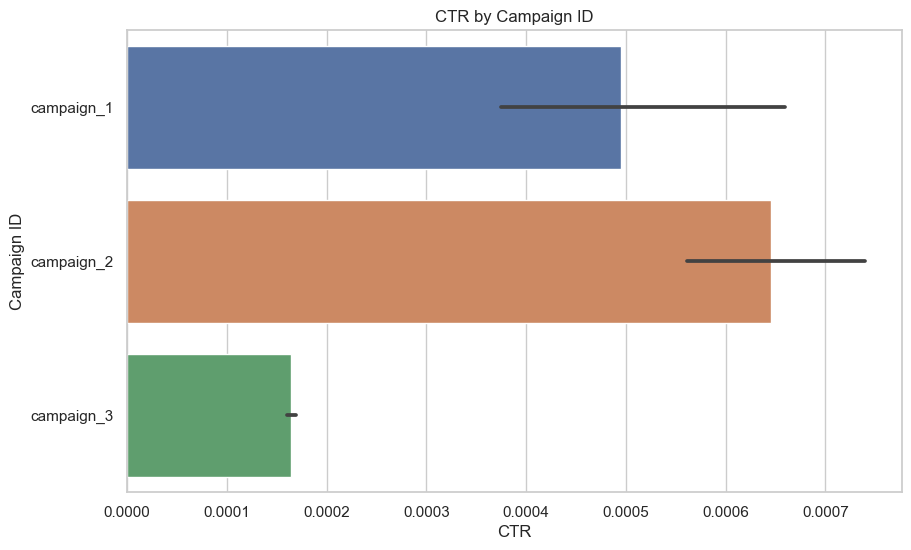

In [94]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df, x="CTR", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("CTR")
plt.ylabel("Campaign ID")
plt.title("CTR by Campaign ID")

# Display the plot
plt.show()

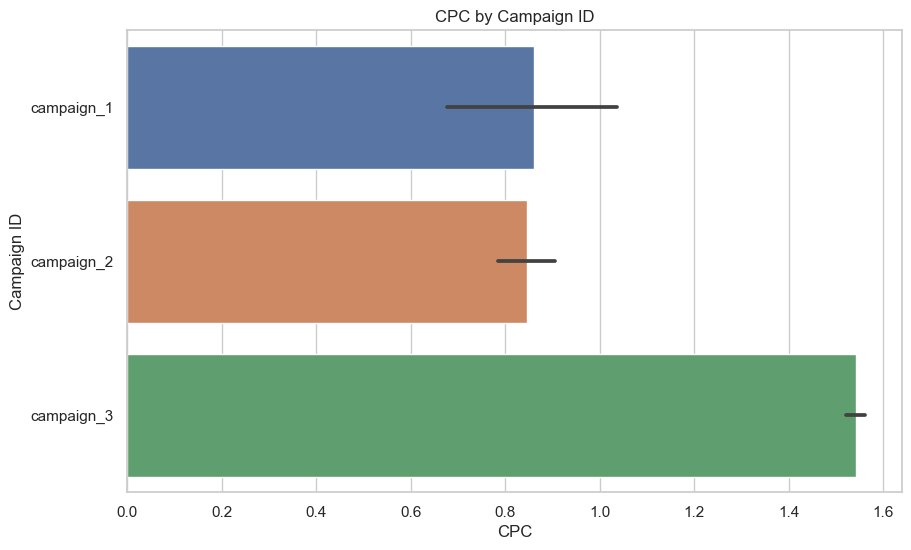

In [95]:

plt.figure(figsize=(10, 6))  
sns.barplot(data=df, x="CPC", y="xyz_campaign_id")

# Add labels and title
plt.xlabel("CPC")
plt.ylabel("Campaign ID")
plt.title("CPC by Campaign ID")

# Display the plot
plt.show()

Based on the charts, it's evident that campaign_2 has the highest mean CR and CTR, followed by campaign_1, while surprisingly, campaign_3 has the lowest mean CR and CTR. Additionally, campaign_3 has the highest mean CPC. When examining the KPIs, it becomes clear that campaign_3 is not cost-efficient, as it has the highest CPC, along with lower CR and CTR compared to its counterparts. In contrast, campaigns_2 and campaign_1 have demonstrated better performance in terms of conversion, engagement, and cost-efficiency, with higher CTR and CR, while maintaining a lower CPC.

To determine whether the differences between these ad campaigns are statistically significant or merely due to chance, we can conduct A/B testing. The primary goal of A/B testing for these three groups is to perform pairwise comparisons between each pair of groups (A-B, A-C, and B-C) to ascertain whether the differences between them are statistically significant or not. 